<br>
<br>
<br>
# 연관규칙분석 - 공생앱과 경쟁앱
<br>

---

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns',50)
pd.set_option('max_rows',100)

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
sns.set() 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
sns.set_style(style='white')
sns.set_context(context ='paper')

import datetime
import os

In [91]:
font_path = 'NanumSquareRoundR.ttf'
fontprop = fm.FontProperties(fname=font_path) # 얘네는 한번 선언만 하면 됨

In [49]:
DA_final = pd.read_csv("DA_final.csv")

AR_App = pd.read_csv('AR_target_app.csv')

In [50]:
DA_final.head()

,pid,Location_CU,Location_GS25,Location_KFC,Location_THE FACE SHOP,Location_UNIQLO,Location_다이소,Location_던킨도너츠,Location_뚜레쥬르,Location_롯데리아,Location_맘스터치,Location_매표소/로비/휴게소,Location_맥도날드,Location_배스킨라빈스,Location_버거킹,Location_분당선,Location_빽다방,Location_서울5호선,Location_설빙,Location_세븐일레븐,Location_스타벅스,Location_엔제리너스,Location_올리브영,Location_이디야,Location_투썸플레이스,...,Std_틸리언,Std_패널나우,Std_패널락,Std_패널파워,Std_포토,Std_핀크,Std_핑크다이어리,Std_하나1Q페이,Std_하나멤버스,Std_하나카드,Std_하이마트,Std_한컴오피스 viewer,Std_해피머니,Std_해피스크린,Std_해피포인트,Std_허니스크린,Std_현대Hmall,Std_현대카드,Std_현대해상,Std_홈&쇼핑,Std_홈쇼핑모아,Std_홈플러스,Std_화해,Std_후스콜,Std_후후
0,A0002542,5.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,15.900199,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,8.749857,0.0
1,A0003204,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,19.697716,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,21.5,0.0,3.316625,0.000000,0.000000,0.0,0.000000,0.0
2,A0003696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.5,0.000000,0.000000,10.935416,12.947303,0.0,0.0,0.0,16.174362,0.0,0.0,0.0,0.000000,0.0,13.146863,0.0,0.000000,0.0,0.0,0.000000,0.000000,13.355149,0.0,0.000000,0.0
3,A0003768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,17.878273,0.000000,0.0,0.0,0.0,16.000000,0.0,0.0,0.0,11.807988,0.0,18.193405,0.0,0.000000,0.0,0.0,0.000000,0.000000,18.330303,0.0,0.000000,0.0
4,A0008228,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,14.372041,10.673175,19.185900,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,14.371173,0.0,0.0,18.237798,3.039737,0.000000,0.0,0.000000,0.0


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [51]:
freq_starb_ediya = AR_App[['panel_id','스타벅스','이디야멤버스']]

In [52]:
freq_starb_ediya.head()

,panel_id,스타벅스,이디야멤버스
0,A0002542,0.0,0.0
1,A0003204,0.0,0.0
2,A0003696,0.0,0.0
3,A0003768,1.0,0.0
4,A0008228,0.0,0.0


In [53]:
# 이미 알지만 freq check

freq_starb_ediya.sum()

panel_id    A0002542A0003204A0003696A0003768A0008228A00091...
스타벅스                                                     1600
이디야멤버스                                                   1096
dtype: object

In [54]:
freq_starb_ediya['둘다'] = (freq_starb_ediya['스타벅스'] + freq_starb_ediya['이디야멤버스']).map(lambda x: 0 if x < 2 else 1)
freq_starb_ediya['스타벅스만'] = (freq_starb_ediya['스타벅스'] - freq_starb_ediya['둘다']).map(lambda x: 0 if x <1 else 2)
freq_starb_ediya['이디야만'] = (freq_starb_ediya['이디야멤버스'] - freq_starb_ediya['둘다']).map(lambda x: 0 if x <1 else 3)
freq_starb_ediya['sb_ed_target'] = freq_starb_ediya['둘다'] + freq_starb_ediya['스타벅스만'] + freq_starb_ediya['이디야만']

freq_starb_ediya = freq_starb_ediya[['panel_id', 'sb_ed_target']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [55]:
del DA_final['App_스타벅스']
del DA_final['App_이디야멤버스']
del DA_final['Location_스타벅스']
del DA_final['Location_이디야']
del DA_final['Mean_스타벅스']
del DA_final['Mean_이디야멤버스']
del DA_final['Std_스타벅스']
del DA_final['Std_이디야멤버스']

In [56]:
DA_sb_ed = freq_starb_ediya.merge(DA_final, how='left', left_on='panel_id', right_on='pid')

In [57]:
del DA_sb_ed['panel_id']
del DA_sb_ed['pid']

In [58]:
DA_sb_ed.head()

,sb_ed_target,Location_CU,Location_GS25,Location_KFC,Location_THE FACE SHOP,Location_UNIQLO,Location_다이소,Location_던킨도너츠,Location_뚜레쥬르,Location_롯데리아,Location_맘스터치,Location_매표소/로비/휴게소,Location_맥도날드,Location_배스킨라빈스,Location_버거킹,Location_분당선,Location_빽다방,Location_서울5호선,Location_설빙,Location_세븐일레븐,Location_엔제리너스,Location_올리브영,Location_투썸플레이스,Location_파리바게뜨,Location_푸드코트,...,Std_틸리언,Std_패널나우,Std_패널락,Std_패널파워,Std_포토,Std_핀크,Std_핑크다이어리,Std_하나1Q페이,Std_하나멤버스,Std_하나카드,Std_하이마트,Std_한컴오피스 viewer,Std_해피머니,Std_해피스크린,Std_해피포인트,Std_허니스크린,Std_현대Hmall,Std_현대카드,Std_현대해상,Std_홈&쇼핑,Std_홈쇼핑모아,Std_홈플러스,Std_화해,Std_후스콜,Std_후후
0,0,5.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,15.900199,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,8.749857,0.0
1,0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,19.697716,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,21.5,0.0,3.316625,0.000000,0.000000,0.0,0.000000,0.0
2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,18.5,0.000000,0.000000,10.935416,12.947303,0.0,0.0,0.0,16.174362,0.0,0.0,0.0,0.000000,0.0,13.146863,0.0,0.000000,0.0,0.0,0.000000,0.000000,13.355149,0.0,0.000000,0.0
3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.000000,0.000000,17.878273,0.000000,0.0,0.0,0.0,16.000000,0.0,0.0,0.0,11.807988,0.0,18.193405,0.0,0.000000,0.0,0.0,0.000000,0.000000,18.330303,0.0,0.000000,0.0
4,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,14.372041,10.673175,19.185900,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,14.371173,0.0,0.0,18.237798,3.039737,0.000000,0.0,0.000000,0.0


In [59]:
DA_sb_ed.columns

Index(['sb_ed_target', 'Location_CU', 'Location_GS25', 'Location_KFC',
       'Location_THE FACE SHOP', 'Location_UNIQLO', 'Location_다이소',
       'Location_던킨도너츠', 'Location_뚜레쥬르', 'Location_롯데리아',
       ...
       'Std_허니스크린', 'Std_현대Hmall', 'Std_현대카드', 'Std_현대해상', 'Std_홈&쇼핑',
       'Std_홈쇼핑모아', 'Std_홈플러스', 'Std_화해', 'Std_후스콜', 'Std_후후'],
      dtype='object', length=996)

In [60]:
cat_col = ['PS_wedding', 'PS_sido', 'PS_area_group',
       'PS_ps_banner', 'PS_sex', 'PS_phone_type',
       'PS_phone_buy_month', 'PS_phone_company', 'PS_phone_samsung',
       'PS_phone_lg', 'PS_phone_apple', 'PS_home_form',
       'PS_home_own', 'PS_job']

column_dict = pd.DataFrame(DA_sb_ed.columns).reset_index().rename(columns={'index':'feature_number', 0:'feature'})
num_cat_col = list(column_dict[lambda x: x['feature'].isin(cat_col)]['feature_number'])

In [61]:
column_dict[lambda x: x['feature'].isin(cat_col)]

,feature_number,feature
416,416,PS_wedding
417,417,PS_sido
418,418,PS_area_group
419,419,PS_ps_banner
420,420,PS_sex
421,421,PS_phone_type
423,423,PS_phone_buy_month
424,424,PS_phone_company
425,425,PS_phone_samsung
426,426,PS_phone_lg


In [62]:

DA_sb_ed[['PS_wedding', 'PS_sido', 'PS_area_group',
       'PS_ps_banner', 'PS_sex', 'PS_phone_type',
       'PS_phone_buy_month', 'PS_phone_company', 'PS_phone_samsung',
       'PS_phone_lg', 'PS_phone_apple', 'PS_home_form',
       'PS_home_own', 'PS_job']] = \
DA_sb_ed[['PS_wedding', 'PS_sido', 'PS_area_group',
       'PS_ps_banner', 'PS_sex', 'PS_phone_type',
       'PS_phone_buy_month', 'PS_phone_company', 'PS_phone_samsung',
       'PS_phone_lg', 'PS_phone_apple', 'PS_home_form',
       'PS_home_own', 'PS_job']].fillna(0).applymap(lambda x: str(int(x)))

In [63]:
DA_sb_ed[['PS_wedding', 'PS_sido', 'PS_area_group',
       'PS_ps_banner', 'PS_sex', 'PS_phone_type',
       'PS_phone_buy_month', 'PS_phone_company', 'PS_phone_samsung',
       'PS_phone_lg', 'PS_phone_apple', 'PS_home_form',
       'PS_home_own', 'PS_job']].isnull().sum()

PS_wedding            0
PS_sido               0
PS_area_group         0
PS_ps_banner          0
PS_sex                0
PS_phone_type         0
PS_phone_buy_month    0
PS_phone_company      0
PS_phone_samsung      0
PS_phone_lg           0
PS_phone_apple        0
PS_home_form          0
PS_home_own           0
PS_job                0
dtype: int64

In [65]:
DA_sb_ed = DA_sb_ed.fillna(0)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

In [36]:
import pandas as pd
import numpy as np 
from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score, train_test_split

# Models for Classification
# from xgboost import XGBClassifier
from catboost import CatBoostClassifier
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
# from lightgbm import LGBMClassifier

In [37]:
from sklearn import pipeline, metrics
from sklearn.utils import shuffle

from sklearn.metrics import auc, f1_score, accuracy_score, log_loss
my_scorer = metrics.make_scorer(auc, greater_is_better = True)

In [66]:
DA_sb_ed.head()

,sb_ed_target,Location_CU,Location_GS25,Location_KFC,Location_THE FACE SHOP,Location_UNIQLO,Location_다이소,Location_던킨도너츠,Location_뚜레쥬르,Location_롯데리아,Location_맘스터치,Location_매표소/로비/휴게소,Location_맥도날드,Location_배스킨라빈스,Location_버거킹,Location_분당선,Location_빽다방,Location_서울5호선,Location_설빙,Location_세븐일레븐,Location_엔제리너스,Location_올리브영,Location_투썸플레이스,Location_파리바게뜨,Location_푸드코트,...,Std_틸리언,Std_패널나우,Std_패널락,Std_패널파워,Std_포토,Std_핀크,Std_핑크다이어리,Std_하나1Q페이,Std_하나멤버스,Std_하나카드,Std_하이마트,Std_한컴오피스 viewer,Std_해피머니,Std_해피스크린,Std_해피포인트,Std_허니스크린,Std_현대Hmall,Std_현대카드,Std_현대해상,Std_홈&쇼핑,Std_홈쇼핑모아,Std_홈플러스,Std_화해,Std_후스콜,Std_후후
0,0,5.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,15.900199,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,8.749857,0.0
1,0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,19.697716,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,21.5,0.0,3.316625,0.000000,0.000000,0.0,0.000000,0.0
2,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,18.5,0.000000,0.000000,10.935416,12.947303,0.0,0.0,0.0,16.174362,0.0,0.0,0.0,0.000000,0.0,13.146863,0.0,0.000000,0.0,0.0,0.000000,0.000000,13.355149,0.0,0.000000,0.0
3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.000000,0.000000,17.878273,0.000000,0.0,0.0,0.0,16.000000,0.0,0.0,0.0,11.807988,0.0,18.193405,0.0,0.000000,0.0,0.0,0.000000,0.000000,18.330303,0.0,0.000000,0.0
4,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,14.372041,10.673175,19.185900,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,14.371173,0.0,0.0,18.237798,3.039737,0.000000,0.0,0.000000,0.0


In [67]:
features = DA_sb_ed.columns[1:]

In [80]:
cbc = CatBoostClassifier(
 learning_rate =0.1,
 iterations=200,
 loss_function='MultiClass'
)

In [69]:
num_cat_col 

[416, 417, 418, 419, 420, 421, 423, 424, 425, 426, 427, 429, 430, 447]

In [81]:
cbc.fit(DA_sb_ed[features], DA_sb_ed['sb_ed_target'], cat_features = [416, 417, 418, 419, 420, 421, 423, 424, 425, 426, 427, 429, 430] )

0:	learn: -1.2413895	total: 932ms	remaining: 3m 5s
1:	learn: -1.1382564	total: 1.56s	remaining: 2m 34s
2:	learn: -1.0596103	total: 2.11s	remaining: 2m 18s
3:	learn: -0.9962300	total: 2.7s	remaining: 2m 12s
4:	learn: -0.9449285	total: 3.03s	remaining: 1m 58s
5:	learn: -0.9041658	total: 3.38s	remaining: 1m 49s
6:	learn: -0.8690649	total: 3.69s	remaining: 1m 41s
7:	learn: -0.8398984	total: 4.09s	remaining: 1m 38s
8:	learn: -0.8132133	total: 4.41s	remaining: 1m 33s
9:	learn: -0.7914287	total: 4.72s	remaining: 1m 29s
10:	learn: -0.7716483	total: 5.04s	remaining: 1m 26s
11:	learn: -0.7559808	total: 5.44s	remaining: 1m 25s
12:	learn: -0.7396554	total: 5.79s	remaining: 1m 23s
13:	learn: -0.7249103	total: 6.11s	remaining: 1m 21s
14:	learn: -0.7140861	total: 6.43s	remaining: 1m 19s
15:	learn: -0.7021001	total: 6.83s	remaining: 1m 18s
16:	learn: -0.6912095	total: 7.17s	remaining: 1m 17s
17:	learn: -0.6854926	total: 7.49s	remaining: 1m 15s
18:	learn: -0.6754848	total: 7.81s	remaining: 1m 14s
19:	l

158:	learn: -0.5093863	total: 54.7s	remaining: 14.1s
159:	learn: -0.5089722	total: 55s	remaining: 13.8s
160:	learn: -0.5085379	total: 55.4s	remaining: 13.4s
161:	learn: -0.5081097	total: 55.7s	remaining: 13.1s
162:	learn: -0.5076754	total: 56s	remaining: 12.7s
163:	learn: -0.5074028	total: 56.4s	remaining: 12.4s
164:	learn: -0.5069169	total: 56.7s	remaining: 12s
165:	learn: -0.5066986	total: 57s	remaining: 11.7s
166:	learn: -0.5060022	total: 57.3s	remaining: 11.3s
167:	learn: -0.5057311	total: 57.7s	remaining: 11s
168:	learn: -0.5053508	total: 58.1s	remaining: 10.7s
169:	learn: -0.5047701	total: 58.4s	remaining: 10.3s
170:	learn: -0.5041088	total: 58.7s	remaining: 9.96s
171:	learn: -0.5037700	total: 59.1s	remaining: 9.62s
172:	learn: -0.5030298	total: 59.4s	remaining: 9.27s
173:	learn: -0.5024266	total: 59.7s	remaining: 8.92s
174:	learn: -0.5019229	total: 1m	remaining: 8.57s
175:	learn: -0.5018173	total: 1m	remaining: 8.23s
176:	learn: -0.5017076	total: 1m	remaining: 7.89s
177:	learn: 

In [82]:
cbc.score(DA_sb_ed[features], DA_sb_ed['sb_ed_target'])

0.82398512550356373

In [83]:
from catboost import Pool
p = Pool(DA_sb_ed[features], DA_sb_ed['sb_ed_target'], cat_features =[416, 417, 418, 419, 420, 421, 423, 424, 425, 426, 427, 429, 430])

In [47]:
cbc.get_feature_importance(p)

[0.0,
 0.0,
 0.0,
 2.9790201002362515e-05,
 0.006455977281637688,
 0.007990947393990835,
 0.0,
 0.007473733590375865,
 0.0,
 0.00018174609407313518,
 0.0011221908856045189,
 0.002786179911904551,
 0.00040520522016963877,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03668331548323087,
 0.0,
 0.05941417509531027,
 0.0009368935745627364,
 6.249085072591591e-05,
 0.0,
 0.0,
 0.0,
 13.61418075925645,
 0.4667898335339939,
 0.02336778477224548,
 0.02210807012630255,
 0.00765356310619975,
 9.126856582493055e-05,
 0.0,
 0.0,
 0.0,
 0.010234611625978777,
 0.008853442101342798,
 0.004537772922707798,
 0.001206394114477078,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0009684916889710748,
 0.0,
 0.0,
 0.0,
 0.0009489803942962511,
 0.0,
 0.09921258802316552,
 0.018630619402807278,
 0.00042837969002636016,
 0.0,
 0.008308066826430467,
 0.0,
 0.06401573747729375,
 0.019303246559421623,
 0.018510368704541962,
 0.0011529880632914597,
 0.0027396194187300042,
 0.0012853300071140167,
 0.0,
 0.004473031259249473,
 0.0261576228615878,
 

In [48]:
cbc.eval_metrics(p, metrics = ['Accuracy','AUC'])

{'AUC:class=0': [0.6659690147763675,
  0.6887798496940403,
  0.7569628838501766,
  0.7873419510856894,
  0.7873923718552401,
  0.7923459955196434,
  0.7976231499617221,
  0.8025820999744815,
  0.8100500592960219,
  0.8129847575470166,
  0.8194736562401104,
  0.8226987900930399,
  0.8258881655960507,
  0.8277181253360387,
  0.8292340998327646,
  0.8317311996660081,
  0.8368188498151697,
  0.8376735491864931,
  0.8421051308653869,
  0.8429117434849782,
  0.8432019995470807,
  0.8437296970373055,
  0.8440065175352963,
  0.844813070308277,
  0.8447290456667942,
  0.8459819344626948,
  0.8477518979754131,
  0.8478557318450519,
  0.8476678134873195,
  0.8484969284325502,
  0.8498486239827872,
  0.8502003425141226,
  0.8502670714851008,
  0.8516698161943014,
  0.8521711512524939,
  0.8531605354212938,
  0.8534716779505456,
  0.8542880455676882,
  0.8545803962611668,
  0.8547047575182903,
  0.8553251274852502,
  0.8557566215487058,
  0.8565145190271526,
  0.8568238063114715,
  0.85729551729734

In [84]:
sb_ed_FE = pd.DataFrame(features)
sb_ed_FE['importance'] = cbc.get_feature_importance(p)
sb_ed_FE = sb_ed_FE.rename(columns={0:'feature'})

In [85]:
sb_ed_FE.sort_values(by='importance', ascending=False)

,feature,importance
122,App_엔터테인먼트,19.435379
25,Location_Coffee Shop,11.133513
419,PS_sex,4.543761
430,PS_education,4.522396
403,App_해피포인트,3.071956
89,App_app_count_mean,1.797196
414,PS_BirthYear,1.213574
441,PS_age,1.203517
95,App_금융,1.102623
148,App_CJ ONE,1.062188


In [59]:
DA_sb_ed.groupby('sb_ed_target')['App_금융'].agg([np.mean, np.std, np.median])

,mean,std,median
sb_ed_target,,,
0,41.666756,32.608772,35.0
1,75.044643,43.221533,69.5
2,61.202257,34.270375,56.0
3,58.334877,38.246624,51.0


In [107]:
DA_sb_ed['sb_ed_target_str'] = DA_sb_ed['sb_ed_target'].map(lambda x: 'Neither' if x == 0 
                            else 'Both' if x == 1
                            else 'SB_only' if x == 2
                            else 'ED_only')

In [110]:
DA_sb_ed_1 = DA_sb_ed[lambda x: x['App_금융'] < 200]

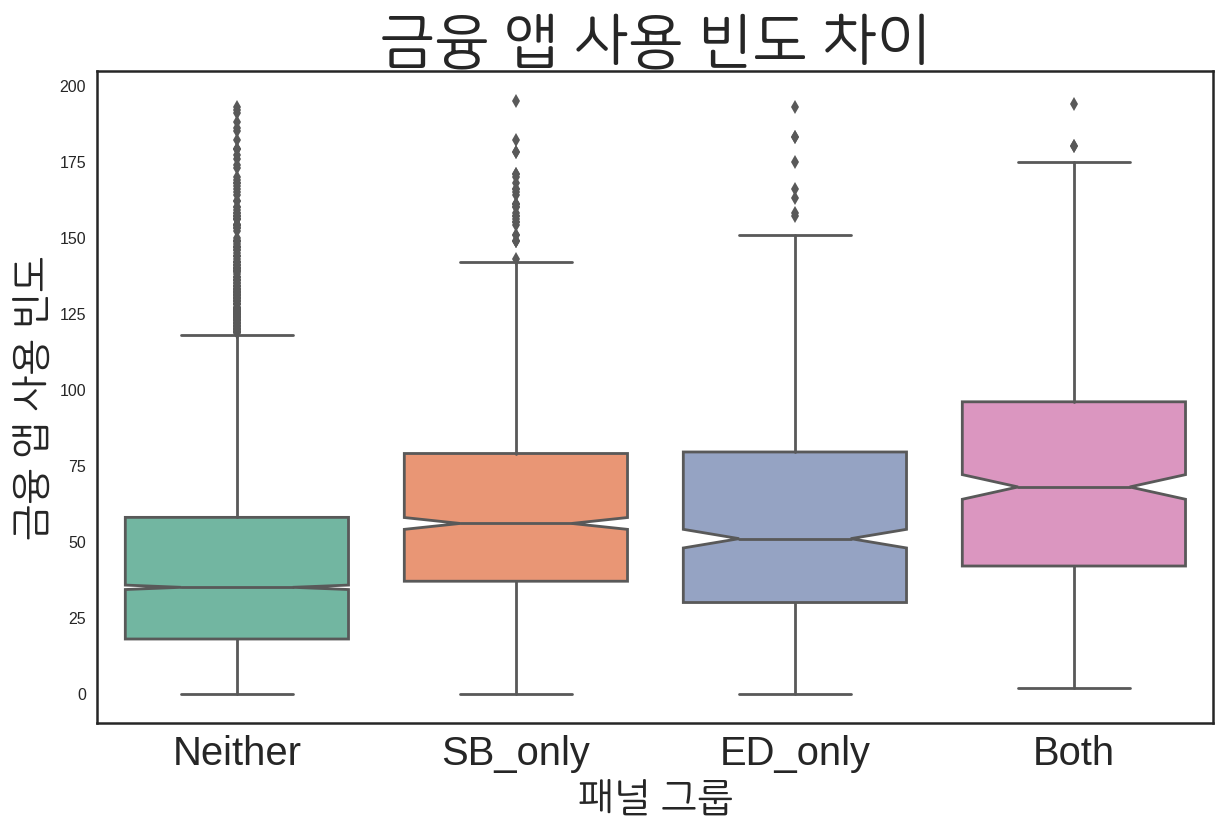

In [136]:
plt.figure(figsize=(10,6))

sns.boxplot(x = 'sb_ed_target_str', y = 'App_금융', data = DA_sb_ed_1, palette = "Set2", notch = True )
plt.xlabel('패널 그룹', fontproperties=fontprop, fontsize=20)
plt.ylabel('금융 앱 사용 빈도', fontproperties=fontprop, fontsize=20)
plt.title('금융 앱 사용 빈도 차이', fontproperties=fontprop, fontsize=30)
plt.xticks(fontsize = 20)

plt.show()

In [86]:
DA_sb_ed.groupby('sb_ed_target')['App_Instagram'].agg([np.mean, np.std, np.median])

,mean,std,median
sb_ed_target,,,
0,3.402529,4.316677,0.0
1,5.229911,4.659627,6.0
2,5.452257,4.554275,7.0
3,3.913580,4.501616,0.0


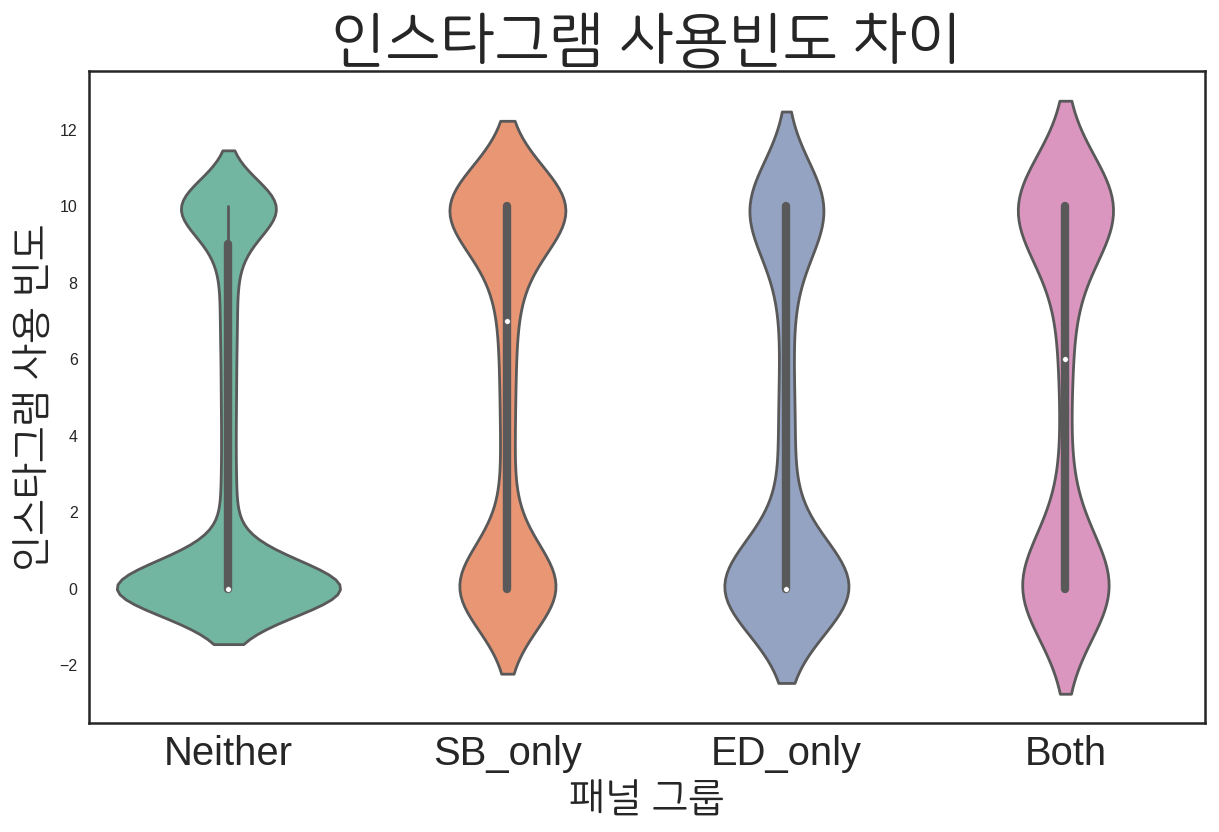

In [137]:
plt.figure(figsize=(10,6))

sns.violinplot(x = 'sb_ed_target_str', y = 'App_Instagram', data = DA_sb_ed, palette = "Set2")
plt.xlabel('패널 그룹', fontproperties=fontprop, fontsize=20)
plt.ylabel('인스타그램 사용 빈도', fontproperties=fontprop, fontsize=20)
plt.title('인스타그램 사용빈도 차이', fontproperties=fontprop, fontsize=30)
plt.xticks(fontsize = 20)

plt.show()

In [88]:
DA_sb_ed.groupby('sb_ed_target')['App_total_usage_time'].agg([np.mean, np.std, np.median])

,mean,std,median
sb_ed_target,,,
0,123.534372,140.895507,77.077524
1,96.780298,94.232396,60.720071
2,98.790474,107.475554,61.170937
3,121.473765,134.543756,71.750728


In [119]:
DA_sb_ed_2 = DA_sb_ed[lambda x: x['App_total_usage_time'] < 400]

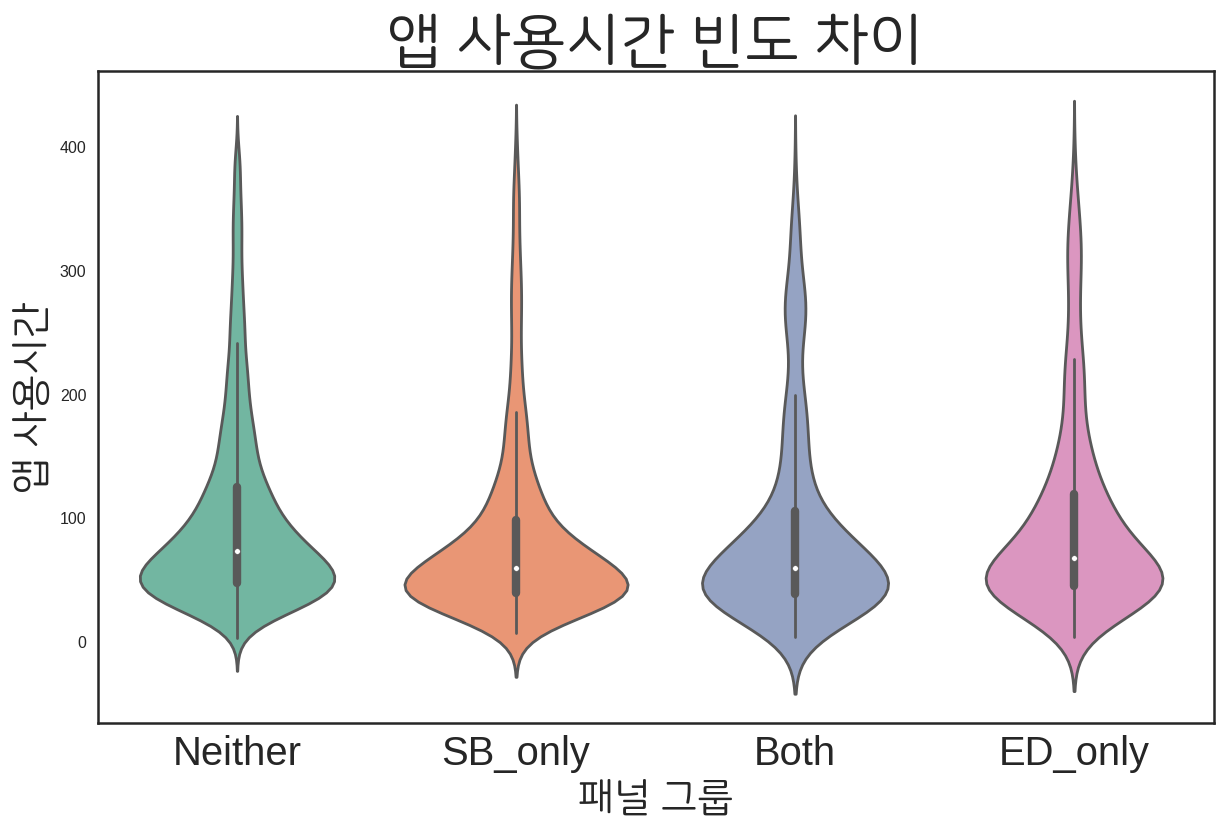

In [120]:
plt.figure(figsize=(10,6))

sns.violinplot(x = 'sb_ed_target_str', y = 'App_total_usage_time', data = DA_sb_ed_2, palette = "Set2")
plt.xlabel('패널 그룹', fontproperties=fontprop, fontsize=20)
plt.ylabel('앱 사용시간', fontproperties=fontprop, fontsize=20)
plt.title('앱 사용시간 빈도 차이', fontproperties=fontprop, fontsize=30)
plt.xticks(fontsize = 20)

plt.show()

In [61]:
DA_sb_ed.groupby('sb_ed_target')['App_여행 및 지역정보'].agg([np.mean, np.std, np.median])

,mean,std,median
sb_ed_target,,,
0,8.003498,9.077482,5.0
1,14.995536,13.191075,12.0
2,14.579861,13.572045,11.0
3,10.868827,11.267566,9.0


In [130]:
DA_sb_ed_3 = DA_sb_ed[lambda x: x['App_여행 및 지역정보'] < 20]

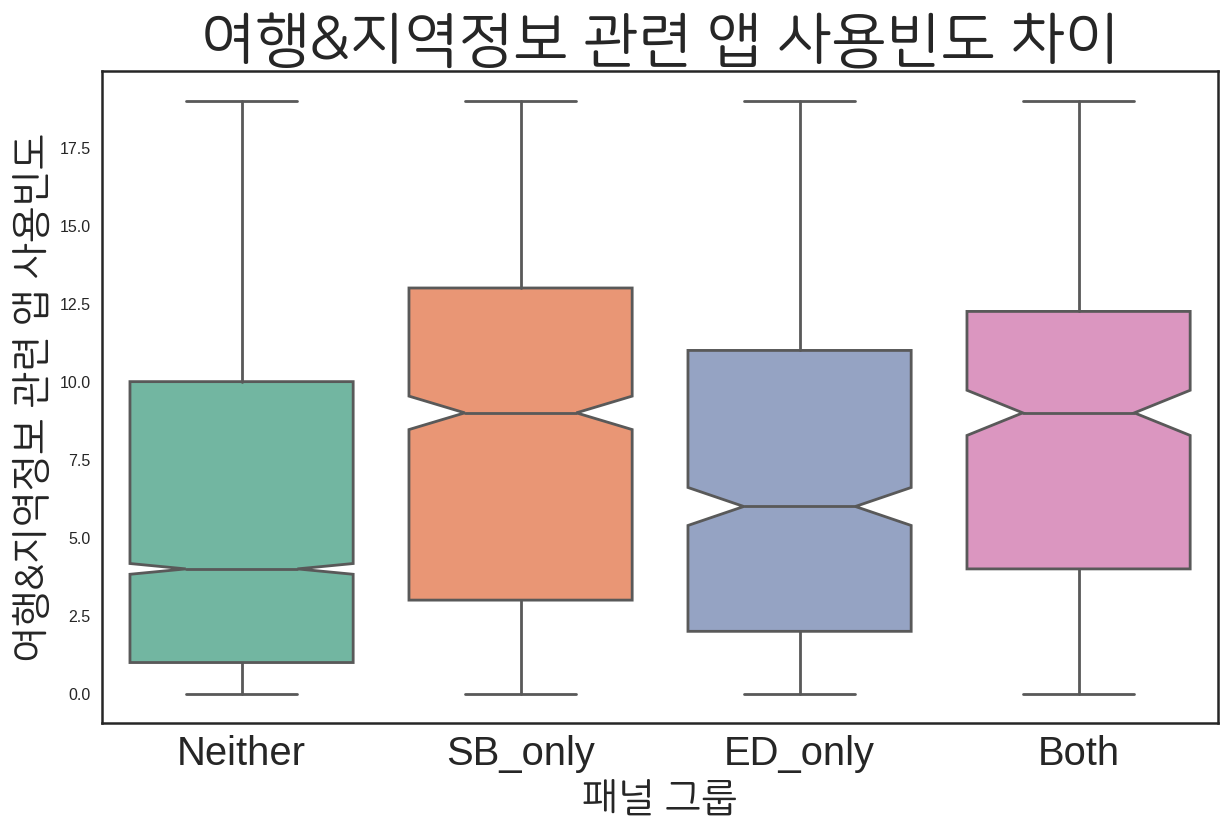

In [135]:
plt.figure(figsize=(10,6))

sns.boxplot(x = 'sb_ed_target_str', y = 'App_여행 및 지역정보', data = DA_sb_ed_3, palette = "Set2", notch=True)
plt.xlabel('패널 그룹', fontproperties=fontprop, fontsize=20)
plt.ylabel('여행&지역정보 관련 앱 사용빈도', fontproperties=fontprop, fontsize=20)
plt.title('여행&지역정보 관련 앱 사용빈도 차이', fontproperties=fontprop, fontsize=30)
plt.xticks(fontsize = 20)

plt.show()

In [65]:
DA_sb_ed.groupby('sb_ed_target')['App_Samsung Pay'].agg([np.mean, np.std, np.median])

,mean,std,median
sb_ed_target,,,
0,3.365398,4.134928,1.0
1,5.616071,4.419796,8.0
2,5.145833,4.471310,6.0
3,3.700617,4.199787,1.0


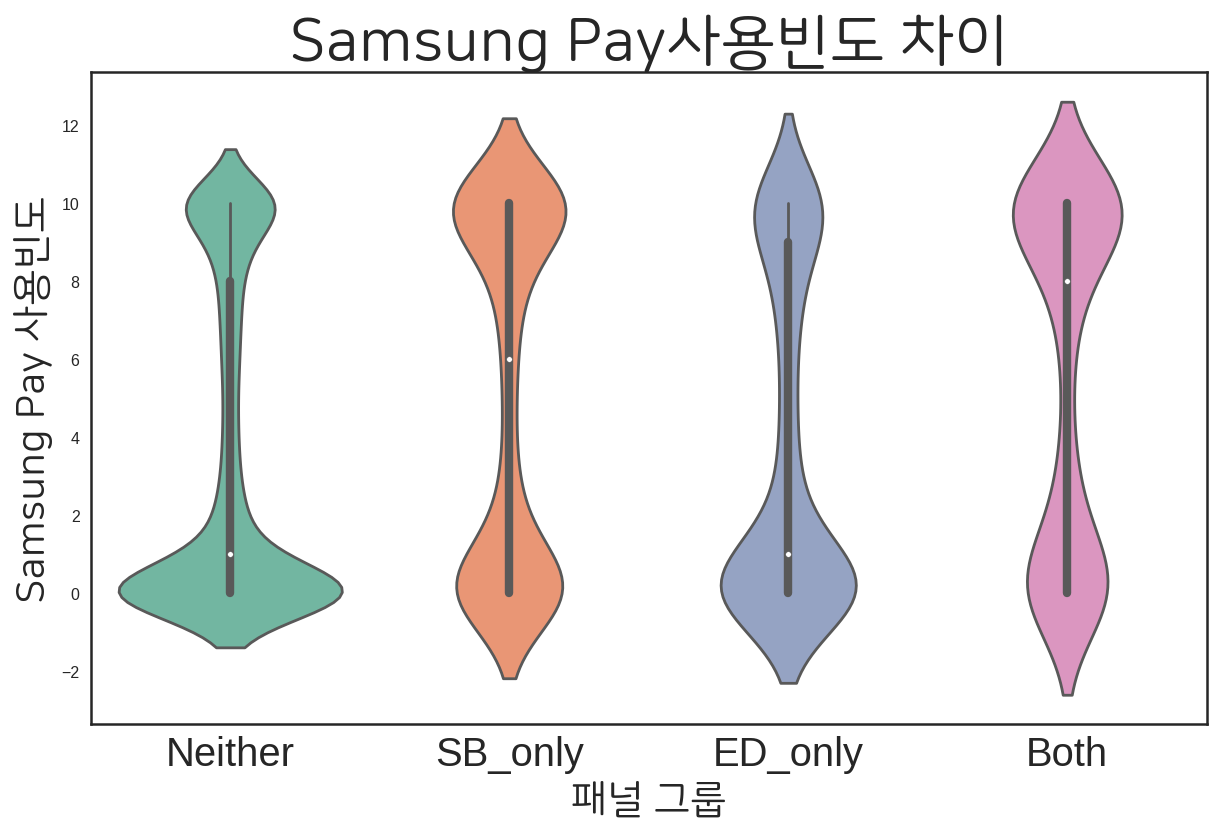

In [133]:
plt.figure(figsize=(10,6))

sns.violinplot(x = 'sb_ed_target_str', y = 'App_Samsung Pay', data = DA_sb_ed, palette = "Set2", notch=True)
plt.xlabel('패널 그룹', fontproperties=fontprop, fontsize=20)
plt.ylabel('Samsung Pay 사용빈도', fontproperties=fontprop, fontsize=20)
plt.title('Samsung Pay사용빈도 차이', fontproperties=fontprop, fontsize=30)
plt.xticks(fontsize = 20)

plt.show()